In [2]:
# load required packages
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Priyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defining Functions

In [3]:
def print_cluster(df, km, num_clusters, cluster_level, num_cluster_topics=3, num_cluster_companies=2) :
    
    print("Top terms per cluster:")
    print()
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
    for i in range(num_clusters):
        print("Cluster %d words:" % int(i), end='')

        for ind in range(0,num_cluster_topics): # top 6 words per cluster
            print(' %s' % terms[order_centroids[i,ind]], end=',')
        print() #add whitespace
        print() #add whitespace

        print("Cluster %d Companies:" % int(i), end='')
        #print()
        for title in df[df[cluster_level]==i]["Company"].sample(num_cluster_companies).values.tolist():
            print(' %s,' % title, end='')
            #uncomment below to see the Sector and Industry of each Company
            #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
        print() #add whitespace
        print() #add whitespace

    print("Split of classes within clusters:")
    print(df[cluster_level].value_counts())
    

In [106]:
def find_number_clusters(tfidf):
    import time
    wcss = []
    start = time.time()
    for i in range(1, 10):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(tfidf)
        wcss.append(kmeans.inertia_)
    end = time.time()
    print("execution time:",round(((end-start)/60),2),"minutes")
    plt.plot(range(1, 10), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()  

In [5]:
def apply_kmeans(num_clusters,random_state,tfidf):
    km = KMeans(n_clusters=num_clusters, random_state =random_state)
    km.fit(tfidf)
    clusters = km.labels_.tolist()
    return km,clusters

In [17]:
def apply_agglomerative(num_clusters,tfidf):
    hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean',linkage='ward')
    hc.fit(tfidf.todense())
    clusters=hc.labels_.tolist()
    return hc,clusters    

In [68]:
def freq_words(indexes,new_corpus,terms,X):
    cluster_descriptions=""
    for i in (indexes):
        cluster_descriptions = cluster_descriptions+new_corpus[i]+" "
    cluster_descriptions=cluster_descriptions[:-1]
    from collections import Counter
    Counter = Counter(cluster_descriptions.split())
    #freq_words has most commonly occuring words within parent cluster ranked in descending order
    freq_words=Counter.most_common()
    # freq_terms has most commonly occuring terms(from tfidf matrix) within parent cluster ranked in descending order along with 
    #frequencies
    freq_terms_with_count = []
    for word in freq_words:
        if word[0] in set(terms):
            freq_terms_with_count.append(word)
    #sorted list of most occuring terms in cluster 3 , subcluster 1
    freq_terms = []
    for i in range(len(freq_terms_with_count)):
        freq_terms.append(freq_terms_with_count[i][0])
    # top X most occuring terms from that cluster
    # here is where you can play around with the X value
    X_freq_terms=freq_terms[0:X]
    # freq terms after X terms removed
    freq_terms_with_count = freq_terms_with_count[X:] 
    return X_freq_terms, freq_terms_with_count   

In [8]:
def print_cluster_words(df, km, num_clusters, cluster_level, words, num_cluster_topics=3, num_cluster_companies=2) :
    
    print("Top terms per cluster:")
    print()
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
    for i in range(num_clusters):
        print("Cluster %d words:" % int(i), end='')
        #for ind in range(num_cluster_topics): # top 6 words per cluster
            #check_word = terms[order_centroids[i,ind]]
            #if check_word not in set(words):
                #print(' %s' % check_word, end=',')
            #else:
                # run ind for one more loop
                #continue
        flag=0
        ind=0
        while flag < num_cluster_topics: # top n words per cluster
            check_word = terms[order_centroids[i,ind]]
            if check_word not in set(words):
                print(' %s' % check_word, end=',')
                flag=flag+1
                ind = ind+1
            else:
                ind = ind+1
                    
        print() #add whitespace
        print() #add whitespace

        print("Cluster %d Companies:" % int(i), end='')
        #print()
        for title in df[df[cluster_level]==i]["Company"].sample(num_cluster_companies).values.tolist():
            print(' %s,' % title, end='')
            #uncomment below to see the Sector and Industry of each Company
            #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
        print() #add whitespace
        print() #add whitespace

    print("Split of classes within clusters:")
    print(df[cluster_level].value_counts())
    

In [96]:
def print_agg_cluster(df, clusters, num_clusters, cluster_level, words, num_cluster_topics=3, num_cluster_companies=2) :
    
    print("Top terms per cluster:")
    print()
    #sort cluster centers by proximity to centroid
    #order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
    for i in range(num_clusters):
        X_freq_terms, freq_terms_with_count = freq_words(indexes=df[df[cluster_level]==i].index.values,new_corpus=new_corpus,\
                                                 terms=terms,X=0)
        print("Cluster %d words:" % int(i), end='')

              
        flag=0
        ind=0
        while flag < num_cluster_topics: # top n words per cluster
            check_word = freq_terms_with_count[ind][0]
            if check_word not in set(words):
                print(' %s' % check_word, end=',')
                flag=flag+1
                ind = ind+1
            else:
                ind = ind+1
        
        
        print() #add whitespace
        print() #add whitespace

        print("Cluster %d Companies:" % int(i), end='')
        #print()
        for title in df[df[cluster_level]==i]["Company"].sample(num_cluster_companies).values.tolist():
            print(' %s,' % title, end='')
            #uncomment below to see the Sector and Industry of each Company
            #print("Sector:",merged_df.Sector[merged_df.Company==title].values[0],"Industry:",merged_df.Industry[merged_df.Company==title].values[0])
        print() #add whitespace
        print() #add whitespace

    print("Split of classes within clusters:")
    print(df[cluster_level].value_counts())

## Reading from the text files to create corpus

In [11]:
#change path below to folder where you place the files
corpus_path = "C:\\Users\\Mr. Priyan\\Dropbox\\Data Science\\DDL\\company_profiles" 
corpus = PlaintextCorpusReader(corpus_path, ".*\.txt")
print("Company Profile Corpus Statistics")
print("Number of profiles: " + str(len(corpus.fileids())))
print("Number of paragraphs: " + str(len(corpus.paras())))
print("Number of sentences: " + str(len(corpus.sents())))
print("Number of words: " + str(len(corpus.words())))

Company Profile Corpus Statistics
Number of profiles: 3558
Number of paragraphs: 3558
Number of sentences: 23988
Number of words: 790836


Changing to list of lists

In [5]:
list_corpus = []
#Converting corpus to list of lists
for i in range(0,len(corpus.fileids())):
    list_corpus.append(list(corpus.words(corpus.fileids()[i])))

## Preprocessing the corpus

Creating list of common words to later remove from the corpus

In [3]:
common_words = ['product','products','service','services','solution','solutions','segment','segments','offering','offerings',\
                'market','markets','provide','provides','provided','industry','industries','sells','sell','sold','state',\
                'states','headquarter','headquarters','headquartered', 'canada', 'california','texas','america','management',\
               'manages','manage', 'management','business','businesses','operation','operations','state','states',\
                'subsidiary','subsidiaries','approximate','approximately','group','groups','include','including','includes',\
                'base','bases','location','locations','use','uses','store','stores','unit','units','item','items',\
                'outlet','outlets','offer','offers','process','processes','processing','corporation','corporate','custom',\
               'offering','offerings','operate','operations','new york','africa','canada','america','international',\
                'manufacture','manufactures','manufacturer','manufacturers','brand','brands','benefit','benefits','customer',\
                'customers','industry','industries','firm','firms','commercial','commercials','com','new','speciality',\
                'specialities','used','unity','manufacturing','united','produce','produces','operates','operator','industrial',\
                'sales','company','companies','europe', 'asia','americas','middle east','sector','sectors','together',\
                'operators','production','productions','sale','private','public'\
               ]      
               
# to see the common words sorted in order
common_words.sort() 
#common_words      
               

 Pre-Processing Steps :-
- Removing punctuation
- Converting to lowercase
- Stemming
- Removing stop words
- Removing common words

In [62]:
# Preprocessing
#commenting everything as I had already saved new_corpus after the first time. 

import time
start = time.time()

new_corpus = []    
for i in range(0,len(list_corpus)):
    #remove punctuation
    review = re.sub('[^a-zA-Z]', ' ', str(list_corpus[i]))
    #convert all to lowercase
    review = review.lower()
    review = review.split()
    #stemming
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english')) if not word in set(common_words)]
    review = ' '.join(review)
    new_corpus.append(review)

end = time.time()
print("execution time:",round(((end-start)/60),2),"minutes")


execution time: 10.41 minutes


In [63]:
# to store the new_corpus list instead of having to run it each time 
#%store new_corpus 


Stored 'new_corpus' (list)


In [9]:
#restoring new_corpus which was stored already
%store -r 

In [12]:
#checking the content of a random document from new_corpus and comparing it to original description
import random
rand_num = random.randrange(1,3559,1)
print("Original description:")
print(' '.join(corpus.words(corpus.fileids()[rand_num])))
print()
print("After pre-processing:")
print(new_corpus[rand_num])
print()

Original description:
Shoe Carnival , Inc ., together with its subsidiaries , operates as family footwear retailer in the United States . It provides various dress , casual , and athletic footwear products for men , women , and children , as well as accessories , including socks , belts , shoe care items , handbags , sport bags , backpacks , jewelry , scarves , and wallets . As of November 16 , 2017 , the company operated 424 stores in 35 states and Puerto Rico . It sells its products through online shopping at shoecarnival . com . Shoe Carnival , Inc . was founded in 1978 and is headquartered in Evansville , Indiana .

After pre-processing:
shoe carniv inc famili footwear retail variou dress casual athlet footwear men women children well accessori sock belt shoe care handbag sport bag backpack jewelri scarv wallet novemb oper puerto rico onlin shop shoecarniv shoe carniv inc found evansvil indiana



## Feature Extraction

Using TF-IDF 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
#original: max_df=0.8, min_df=0.05, max_features=200000
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.02, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=None, ngram_range=(1,3))
#fit the vectorizer to corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(new_corpus) 

In [14]:
# to see shape of tfidf matrix
tfidf_matrix.shape

(3558, 735)

In [15]:
#tdidf feature names
terms = tfidf_vectorizer.get_feature_names()

In [132]:
#terms

execution time: 0.63 minutes


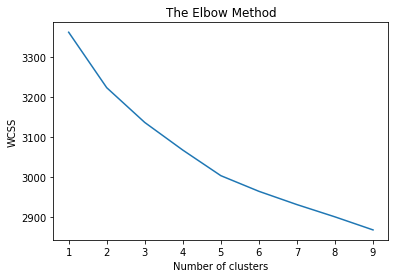

In [134]:
find_number_clusters(tfidf=tfidf_matrix.todense())

In [138]:
# Apply Agglomerative Clustering
hc, clusters = apply_agglomerative(num_clusters=5,tfidf= tfidf_matrix)

In [25]:
# saving the clustering model
#from sklearn.externals import joblib

#uncomment the below to save your model 
#joblib.dump(km,  '5clusters.pkl')
#since I've already run my model I am loading from the pickle
#Uncomment to load the model with 5 clusters
num_clusters = 5
#km = joblib.load('5clusters.pkl')
#clusters = km.labels_.tolist()

In [139]:
# creating a dataframe which contains additional information about each company
df = pd.read_csv("C:\\Users\\Mr. Priyan\\Dropbox\\Data Science\\DDL\\company_info.csv")
df.sample(5)

,Ticker,Company,Sector,Industry,Country
3947,LOW,"Lowe's Companies, Inc.",Services,Home Improvement Stores,USA
1765,DTF,DTF Tax-Free Income Inc.,Financial,Closed-End Fund - Debt,USA
6988,WR,"Westar Energy, Inc.",Utilities,Diversified Utilities,USA
4348,MTU,"Mitsubishi UFJ Financial Group, Inc.",Financial,Money Center Banks,Japan
6643,UUP,PowerShares DB US Dollar Bullish ETF,Financial,Exchange Traded Fund,USA


In [140]:
# Creating a dataframe that contains the company ticker along with the cluster number
df_corpus = pd.DataFrame({'Ticker':corpus.fileids(), 'Clusters':clusters})
df_corpus.head(5)

,Clusters,Ticker
0,1,A-profile.txt
1,1,AA-profile.txt
2,1,AAC-profile.txt
3,1,AAL-profile.txt
4,1,AAMC-profile.txt


In [141]:
# Removing the "-profile.txt" from the Ticker
import re
for i in range(0,len(df_corpus)):
    df_corpus.loc[i,'Ticker']=re.sub("-profile.txt","",df_corpus.loc[i,'Ticker'])
df_corpus.head(5)

,Clusters,Ticker
0,1,A
1,1,AA
2,1,AAC
3,1,AAL
4,1,AAMC


In [143]:
# merging the two dataframe on the Ticker
merged_df = pd.merge(left=df, right=df_corpus, how='inner', on="Ticker")

In [144]:
merged_df.sample(5)

,Ticker,Company,Sector,Industry,Country,Clusters
3355,VLY,Valley National Bancorp,Financial,Regional - Northeast Banks,USA,3
3074,TAYD,Taylor Devices Inc.,Industrial Goods,Diversified Machinery,USA,1
1635,IDTI,"Integrated Device Technology, Inc.",Technology,Semiconductor - Broad Line,USA,1
2039,MFSF,Mutualfirst Financial Inc.,Financial,Regional - Midwest Banks,USA,3
2333,OCFC,OceanFirst Financial Corp.,Financial,Savings & Loans,USA,3


In [145]:
# Printing the most recurring Sector(taken from previous dataframe) in each cluster
for i in range(num_clusters):
    print("Cluster",i,":",merged_df[merged_df.Clusters==i].Sector.mode()[0],":- % correct categories is ", \
    round(len(merged_df[merged_df.Clusters==i][merged_df[merged_df.Clusters==i].Sector==\
    merged_df[merged_df.Clusters==i].Sector.mode()[0]])/len(merged_df[merged_df.Clusters==i])*100,2))   

Cluster 0 : Financial :- % correct categories is  89.68
Cluster 1 : Services :- % correct categories is  25.26
Cluster 2 : Healthcare :- % correct categories is  98.47
Cluster 3 : Financial :- % correct categories is  99.72
Cluster 4 : Basic Materials :- % correct categories is  71.12


In [146]:
print_agg_cluster(df=merged_df,clusters=clusters,num_clusters=num_clusters,cluster_level='Clusters',words=[],num_cluster_topics=4, num_cluster_companies=5)

Top terms per cluster:

Cluster 0 words: invest, fund, real, estat,

Cluster 0 Companies: EdR, LaSalle Hotel Properties, John Hancock Tax-Advantaged Dividend Income Fund, DCT Industrial Trust Inc., Stifel Financial Corp.,

Cluster 1 words: equip, applic, technolog, base,

Cluster 1 Companies: Modine Manufacturing Company, OpGen, Inc., Aehr Test Systems, ADMA Biologics, Inc., RELM Wireless Corp.,

Cluster 2 words: develop, treatment, clinic, phase,

Cluster 2 Companies: Cytori Therapeutics, Inc., Cancer Genetics, Inc., Achaogen, Inc., vTv Therapeutics Inc., Trevena, Inc.,

Cluster 3 words: loan, bank, deposit, account,

Cluster 3 Companies: American National Bankshares Inc., Fifth Third Bancorp, Opus Bank, Customers Bancorp, Inc., SI Financial Group Inc.,

Cluster 4 words: ga, natur, oil, energi,

Cluster 4 Companies: Isramco Inc., ONE Gas, Inc., KBR, Inc., Xcel Energy Inc., Valero Energy Corporation,

Split of classes within clusters:
1    2241
0     407
3     352
2     326
4     232
N

# Splitting clusters 1, 0 & 4 into sub-clusters

### Splitting the biggest cluster , cluster 1

execution time: 0.42 minutes


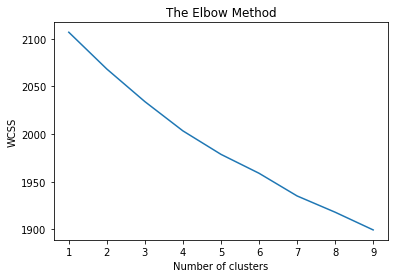

In [107]:
find_number_clusters(tfidf=cluster1_tfidif.todense())

In [148]:
# trying to find subclusters for any cluster 
Subcluster1_df=merged_df[merged_df['Clusters']==1]
# to get only the indices for this cluster
cluster1_tfidif=tfidf_matrix[Subcluster1_df.index.values]
hc,clusters = apply_agglomerative(num_clusters = 4,tfidf = cluster1_tfidif)
# add new column which includes the numbers of the new clusters
Subcluster1_df = Subcluster1_df.assign(Subclusters_level_1 = clusters)
# Printing terms per cluster
print_agg_cluster(df=Subcluster1_df, clusters=clusters, num_clusters=4, num_cluster_topics=5, \
              num_cluster_companies=5, words=[], cluster_level='Subclusters_level_1')

Top terms per cluster:

Cluster 0 words: equip, retail, variou, design, develop,

Cluster 0 Companies: Kimball Electronics, Inc., Adesto Technologies Corporation, Aemetis, Inc., Dollar Tree, Inc., American States Water Company,

Cluster 1 words: insur, life, properti, casualti, health,

Cluster 1 Companies: OneMain Holdings, Inc., United Insurance Holdings Corp., Selective Insurance Group Inc., Conifer Holdings, Inc., Federated National Holding Company,

Cluster 2 words: softwar, network, data, applic, technolog,

Cluster 2 Companies: Clear Channel Outdoor Holdings Inc., RMG Networks Holding Corporation, Red Hat, Inc., Synaptics Inc., TiVo Inc.,

Cluster 3 words: restaur, franchis, oper, decemb, develop,

Cluster 3 Companies: Fiesta Restaurant Group, Inc., Kona Grill Inc., Ruth's Hospitality Group Inc., Buffalo Wild Wings Inc., J. Alexander's Holdings, Inc.,

Split of classes within clusters:
0    1521
2     591
1      89
3      40
Name: Subclusters_level_1, dtype: int64


### Splitting cluster 4


execution time: 0.03 minutes


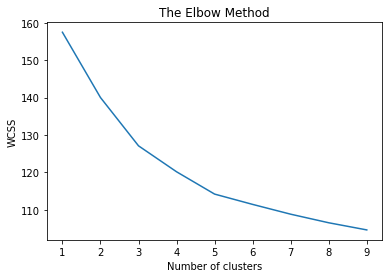

In [113]:
find_number_clusters(tfidf=cluster4_tfidif.todense())

In [117]:
# trying to find subclusters for any cluster 
Subcluster4_df=merged_df[merged_df['Clusters']==4]
# to get only the indices for this cluster
cluster4_tfidif=tfidf_matrix[Subcluster4_df.index.values]
hc,clusters = apply_agglomerative(num_clusters = 3,tfidf = cluster4_tfidif)
# add new column which includes the numbers of the new clusters
Subcluster4_df = Subcluster4_df.assign(Subclusters_level_1 = clusters)
# Printing terms per cluster
X_freq_terms, freq_terms_with_count = freq_words(indexes=Subcluster4_df.index.values,new_corpus=new_corpus,\
                                                terms=terms,X=3)
print_agg_cluster(df=Subcluster4_df, clusters=clusters, num_clusters=3, num_cluster_topics=3, \
              num_cluster_companies=5, words=X_freq_terms, cluster_level='Subclusters_level_1')




Top terms per cluster:

Cluster 0 words: electr, distribut, energi,

Cluster 0 Companies: MDU Resources Group Inc., Unitil Corp., Boardwalk Pipeline Partners, LP, Spectra Energy Partners, LP, EnLink Midstream, LLC,

Cluster 1 words: explor, develop, energi,

Cluster 1 Companies: Rowan Companies plc, California Resources Corporation, WPX Energy, Inc., Jones Energy, Inc., Independence Contract Drilling, Inc.,

Cluster 2 words: crude, storag, refin,

Cluster 2 Companies: Phillips 66, CVR Refining, LP, Transmontaigne Partners L.P., NuStar GP Holdings, LLC, Matrix Service Company,

Split of classes within clusters:
1    112
0     88
2     32
Name: Subclusters_level_1, dtype: int64


### Splitting cluster 0


execution time: 0.04 minutes


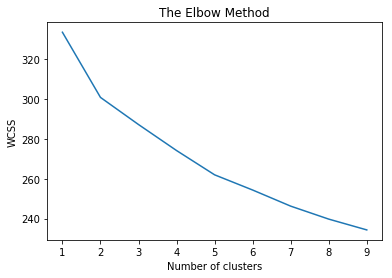

In [122]:
find_number_clusters(tfidf=cluster0_tfidif.todense())

In [119]:
# trying to find subclusters for any cluster 
Subcluster0_df=merged_df[merged_df['Clusters']==0]
# to get only the indices for this cluster
cluster0_tfidif=tfidf_matrix[Subcluster0_df.index.values]
hc,clusters = apply_agglomerative(num_clusters = 2,tfidf = cluster0_tfidif)
#len(clusters1)
# add new column which includes the numbers of the new clusters
Subcluster0_df = Subcluster0_df.assign(Subclusters_level_1 = clusters)
# Printing terms per cluster
#print_cluster(df=Subcluster1_df, km=km, num_clusters=2, num_cluster_topics=6, \
 #             num_cluster_companies=5, cluster_level='Subclusters_level_1')
X_freq_terms, freq_terms_with_count = freq_words(indexes=Subcluster1_df.index.values,new_corpus=new_corpus,\
                                                terms=terms,X=2)
print_agg_cluster(df=Subcluster0_df, clusters=clusters, num_clusters=2, cluster_level='Subclusters_level_1',\
                    words=X_freq_terms , num_cluster_topics=3, num_cluster_companies=3)

Top terms per cluster:

Cluster 0 words: invest, fund, equiti,

Cluster 0 Companies: Issuer Direct Corporation, BlackRock, Inc., John Hancock Tax-Advantaged Dividend Income Fund,

Cluster 1 words: real, invest, estat,

Cluster 1 Companies: Corporate Office Properties Trust, Sunstone Hotel Investors Inc., Capstead Mortgage Corp.,

Split of classes within clusters:
1    244
0    163
Name: Subclusters_level_1, dtype: int64


In [120]:
#Combining Subclusters and adding into original dataframe
test=pd.concat([Subcluster1_df,Subcluster4_df,Subcluster0_df])
test.drop(['Country','Company','Sector','Industry','Clusters'], axis=1, inplace=True)
merged_df = pd.merge(left=merged_df, right=test, how='left', on="Ticker")

# Creating one more level of sub clusters

### Splitting cluster 1, subcluster 0 into more clusters

execution time: 0.26 minutes


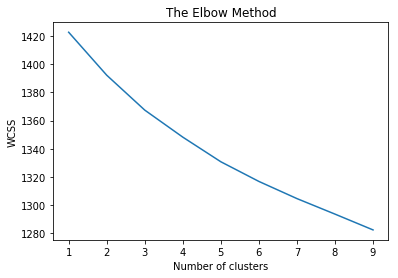

In [124]:
find_number_clusters(tfidf=Subcluster1_level1_0_tfidif.todense())

In [126]:
# trying to find subclusters for any cluster 
Subcluster1_level1_0_df = merged_df[(merged_df['Clusters']==1) & (merged_df['Subclusters_level_1']==0)]
# to get only the indices for this cluster
Subcluster1_level1_0_tfidif=tfidf_matrix[Subcluster1_level1_0_df.index.values]
hc,clusters = apply_agglomerative(num_clusters = 5,tfidf = Subcluster1_level1_0_tfidif)
# add new column which includes the numbers of the new clusters
Subcluster1_level1_0_df = Subcluster1_level1_0_df.assign(Subclusters_level_2 = clusters)
# Printing terms per cluster
X_freq_terms, freq_terms_with_count = freq_words(indexes=Subcluster1_level1_0_df.index.values,new_corpus=new_corpus,\
                                                terms=terms,X=2)
print_agg_cluster(df=Subcluster1_level1_0_df, clusters=clusters, num_clusters=5, num_cluster_topics=5, \
              num_cluster_companies=5, words = X_freq_terms,cluster_level='Subclusters_level_2')

Top terms per cluster:

Cluster 0 words: power, energi, construct, engin, distribut,

Cluster 0 Companies: Cherokee Inc., Norfolk Southern Corporation, FreightCar America Inc., General Moly, Inc., Gramercy Property Trust Inc.,

Cluster 1 words: home, accessori, apparel, oper, variou,

Cluster 1 Companies: CTI Industries Corp., ServiceMaster Global Holdings, Inc., Shake Shack Inc., Tilly's, Inc., LGI Homes, Inc.,

Cluster 2 words: care, health, test, medic, develop,

Cluster 2 Companies: BioScrip, Inc., RCM Technologies Inc., Cerner Corporation, Danaher Corp., Nature's Sunshine Products Inc.,

Cluster 3 words: food, beverag, distribut, natur, specialti,

Cluster 3 Companies: Core-Mark Holding Company, Inc., International Flavors & Fragrances Inc., Hormel Foods Corporation, Post Holdings, Inc., US Foods Holding Corp.,

Cluster 4 words: compon, applic, electron, control, design,

Cluster 4 Companies: Cirrus Logic Inc., Patrick Industries Inc., Sigma Designs, Inc., Chicago Rivet & Machine 

### Splitting cluster 1, subcluster 2 into more clusters

execution time: 0.08 minutes


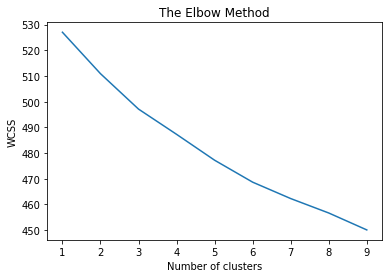

In [128]:
find_number_clusters(tfidf=Subcluster1_level1_2_tfidif.todense())

In [129]:
# trying to find subclusters for any cluster 
Subcluster1_level1_2_df = merged_df[(merged_df['Clusters']==1) & (merged_df['Subclusters_level_1']==2)]
Subcluster1_level1_2_tfidif=tfidf_matrix[Subcluster1_level1_2_df.index.values]
hc,clusters = apply_agglomerative(num_clusters = 4,tfidf = Subcluster1_level1_2_tfidif)
# add new column which includes the numbers of the new clusters
Subcluster1_level1_2_df = Subcluster1_level1_2_df.assign(Subclusters_level_2 = clusters)
# Printing terms per cluster
#print_cluster(df=Subcluster3_level1_2_df, km=km, num_clusters=3, num_cluster_topics=5, \
#              num_cluster_companies=5, cluster_level='Subclusters_level_2')
#removing X most frequent terms from parent cluster
X_freq_terms, freq_terms_with_count = freq_words(indexes=Subcluster1_level1_2_df.index.values,new_corpus=new_corpus,\
                                                 terms=terms,X=0)
print_agg_cluster(df=Subcluster1_level1_2_df, clusters=clusters, num_clusters=4, cluster_level='Subclusters_level_2',\
                    words=X_freq_terms , num_cluster_topics=3, num_cluster_companies=3)

Top terms per cluster:

Cluster 0 words: payment, financi, consum,

Cluster 0 Companies: NMI Holdings, Inc., Stamps.com Inc., Visa Inc.,

Cluster 1 words: digit, video, content,

Cluster 1 Companies: Xerox Corporation, the Rubicon Project, Inc., The New York Times Company,

Cluster 2 words: softwar, network, data,

Cluster 2 Companies: CoreSite Realty Corporation, 8x8 Inc., Diebold, Incorporated,

Cluster 3 words: game, entertain, park,

Cluster 3 Companies: Churchill Downs Inc., Activision Blizzard, Inc., Caesars Entertainment Corporation,

Split of classes within clusters:
2    246
0    210
1     96
3     39
Name: Subclusters_level_2, dtype: int64


### Splitting cluster 3, subcluster 1 into more clusters

In [130]:
test=pd.concat([Subcluster1_level1_2_df,Subcluster1_level1_0_df])
test.drop(['Country','Company','Sector','Industry','Clusters','Subclusters_level_1'], axis=1, inplace=True)
merged_df = pd.merge(left=merged_df, right=test, how='left', on="Ticker")

 #check if new_merged_df is correct, if so then rename it to merged_df
merged_df.columns = ['Ticker', 'Company', 'Sector', 'Industry', 'Country', 'Clusters Level 0','Clusters Level 1', \
                         'Clusters Level 2']
#temp = merged_df[merged_df['Clusters Level 0']==3]
#temp = temp[temp['Clusters Level 1']==3]
#temp = temp[temp['Clusters Level 2']==3].info()



In [131]:
# See the dataframe with the 3 levels, level 0, level 1 and level 2
merged_df

,Ticker,Company,Sector,Industry,Country,Clusters Level 0,Clusters Level 1,Clusters Level 2
0,A,"Agilent Technologies, Inc.",Healthcare,Medical Laboratories & Research,USA,1,0.0,2.0
1,AA,Alcoa Inc.,Basic Materials,Aluminum,USA,1,0.0,3.0
2,AAC,"AAC Holdings, Inc.",Healthcare,Specialized Health Services,USA,1,0.0,2.0
3,AAL,American Airlines Group Inc.,Services,Major Airlines,USA,1,0.0,0.0
4,AAMC,Altisource Asset Management Corporation,Financial,Asset Management,USA,1,0.0,0.0
5,AAME,Atlantic American Corp.,Financial,Life Insurance,USA,1,1.0,NaN
6,AAN,"Aaron's, Inc.",Services,Rental & Leasing Services,USA,1,0.0,1.0
7,AAOI,"Applied Optoelectronics, Inc.",Technology,Semiconductor - Integrated Circuits,USA,1,0.0,4.0
8,AAON,AAON Inc.,Industrial Goods,General Building Materials,USA,1,0.0,0.0
9,AAP,Advance Auto Parts Inc.,Services,Auto Parts Stores,USA,1,0.0,0.0
